#Train YOLOv8 Object Detection on a Custom Dataset

Before starting we need to check that we have access to GPU. We can use Tensorflow and nvidia-smi command to check the status of GPU.
##In case of any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save.

In [1]:
#Sometimes, GPU availability can be limited due to high demand. You can check if GPU is available, If it returns an empty list, no GPU is available.
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!nvidia-smi #use the command !nvidia-smi to view GPU utilization, memory usage, and processes. This can help identify if the GPU is being used by another process.


Fri Aug  2 22:31:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Now that GPU is ready, follow the next steps:


In [2]:
!pip install ultralytics==8.0.196 -q
!pip install roboflow --quiet
from IPython import display
display.clear_output()

In [3]:
import os
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [4]:
#Reading the Content Working Directory
HOME = os.getcwd()
print(HOME)

/content


In [6]:
!cd {HOME}

#It is time to import labeled dataset:
##**Note**: Regardless of how you provide your dataset, you need to have a "data.yaml" file which shows the name and number of classes plus the path to train and validation images. If you want to add other classes, keep in mind that you have to add the name of the class here. (Order of the classes is important and the labels should be based on this order)


# 1) If you want to download the dataset from Roboflow, get the config from the dataset first and then set the values in the following code accordingly.
## **Note**: (api_key) is your personal key for accessing Roboflow

# 2) If you have the dataset ready, just skip the next code and go to the next one and upload your dataset

In [7]:
#Only if you want to download the dataset from Roboflow
!mkdir {HOME}/datasets #to import the whole dataset into the folder
%cd {HOME}/datasets


!pip install roboflow --quiet
from roboflow import Roboflow
#get the following information from Roboflow downloaded dataset
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("juju-zin7h").project("wall-identification") #You need to change these values based on the dataset you want to download
dataset = project.version(7).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wall-identification-7 in yolov8:: 100%|██████████| 388/388 [00:00<00:00, 7428.29it/s]


In [ ]:
#If you want to download the dataset to your local computer
#!zip -r /content/dataset.zip  /content/datasets

In [ ]:
#Only if you want to use your own dataset
#First upload your dataset as "data.zip"

!mkdir {HOME}/datasets
!unzip /content/data.zip -d /content/datasets

#Training

In [10]:
%cd {HOME}
#!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True #Only if you are using Roboflow dataset
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.71 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=

In [13]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1722705612.891d7bdd752c.3442.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2385.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2386.jpg  weights
P_curve.png					    train_batch2387.jpg
PR_curve.png					    train_batch2.jpg


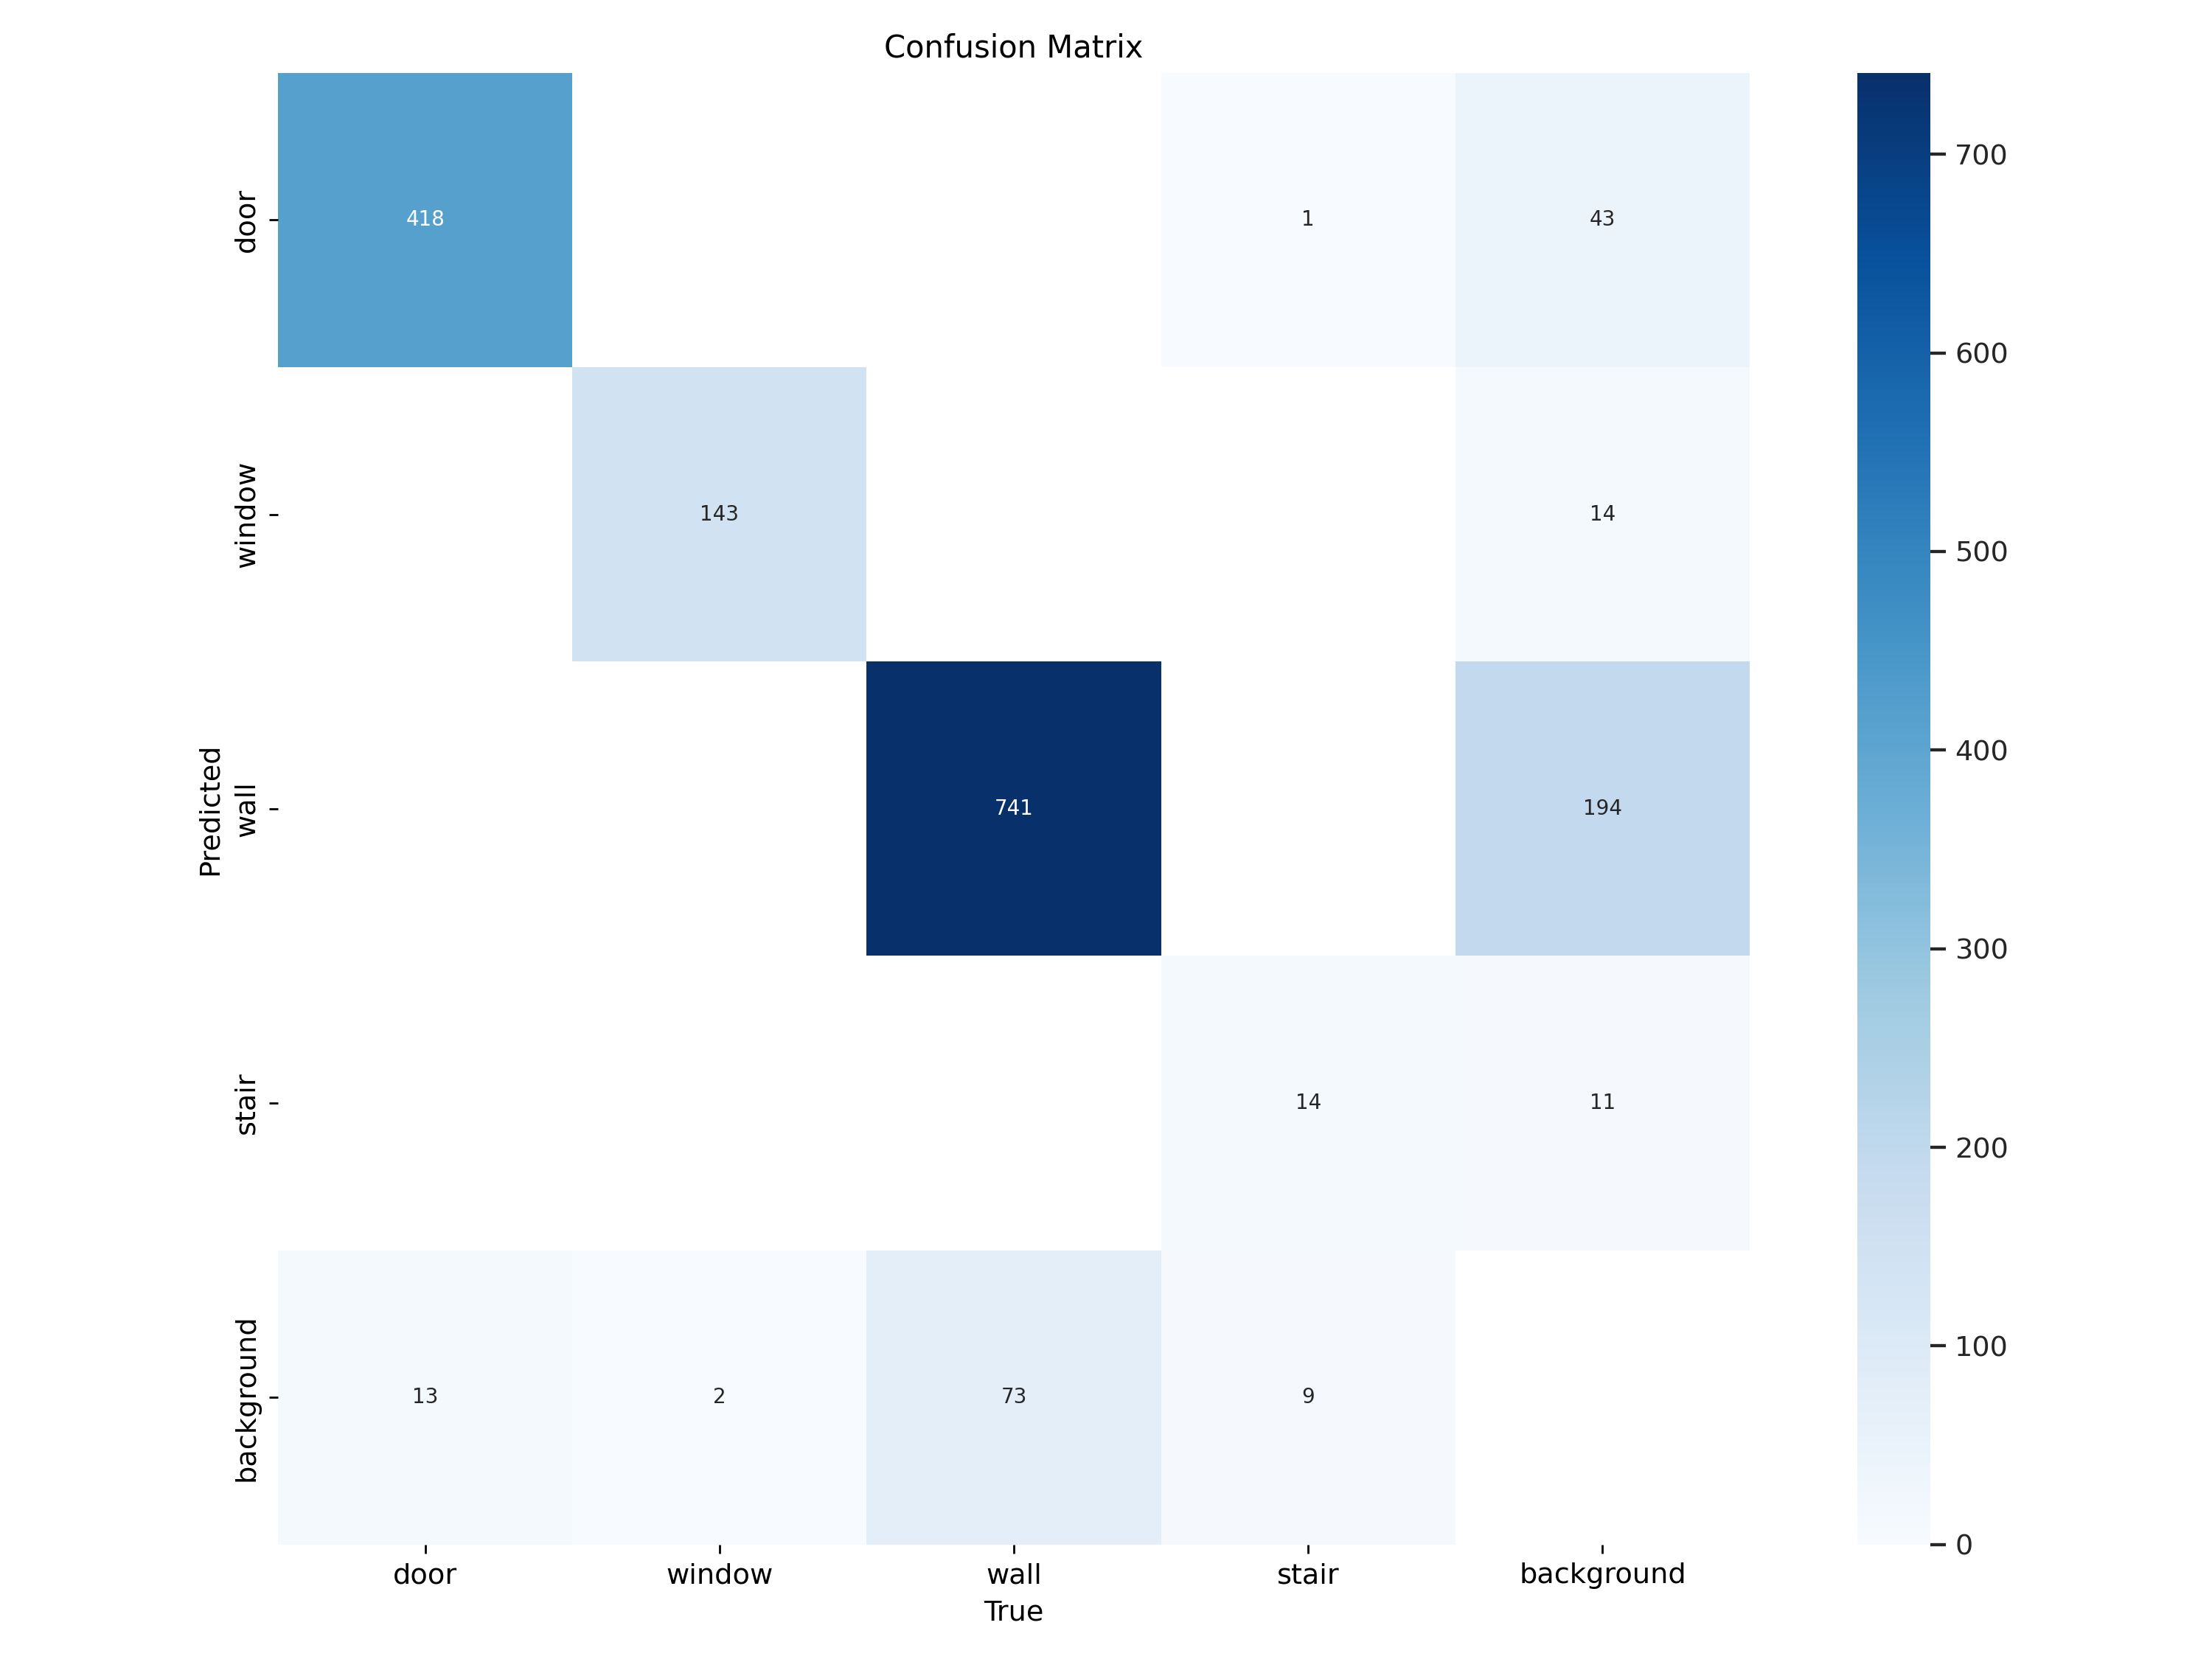

In [14]:
#Showing the cnfusion matrix
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


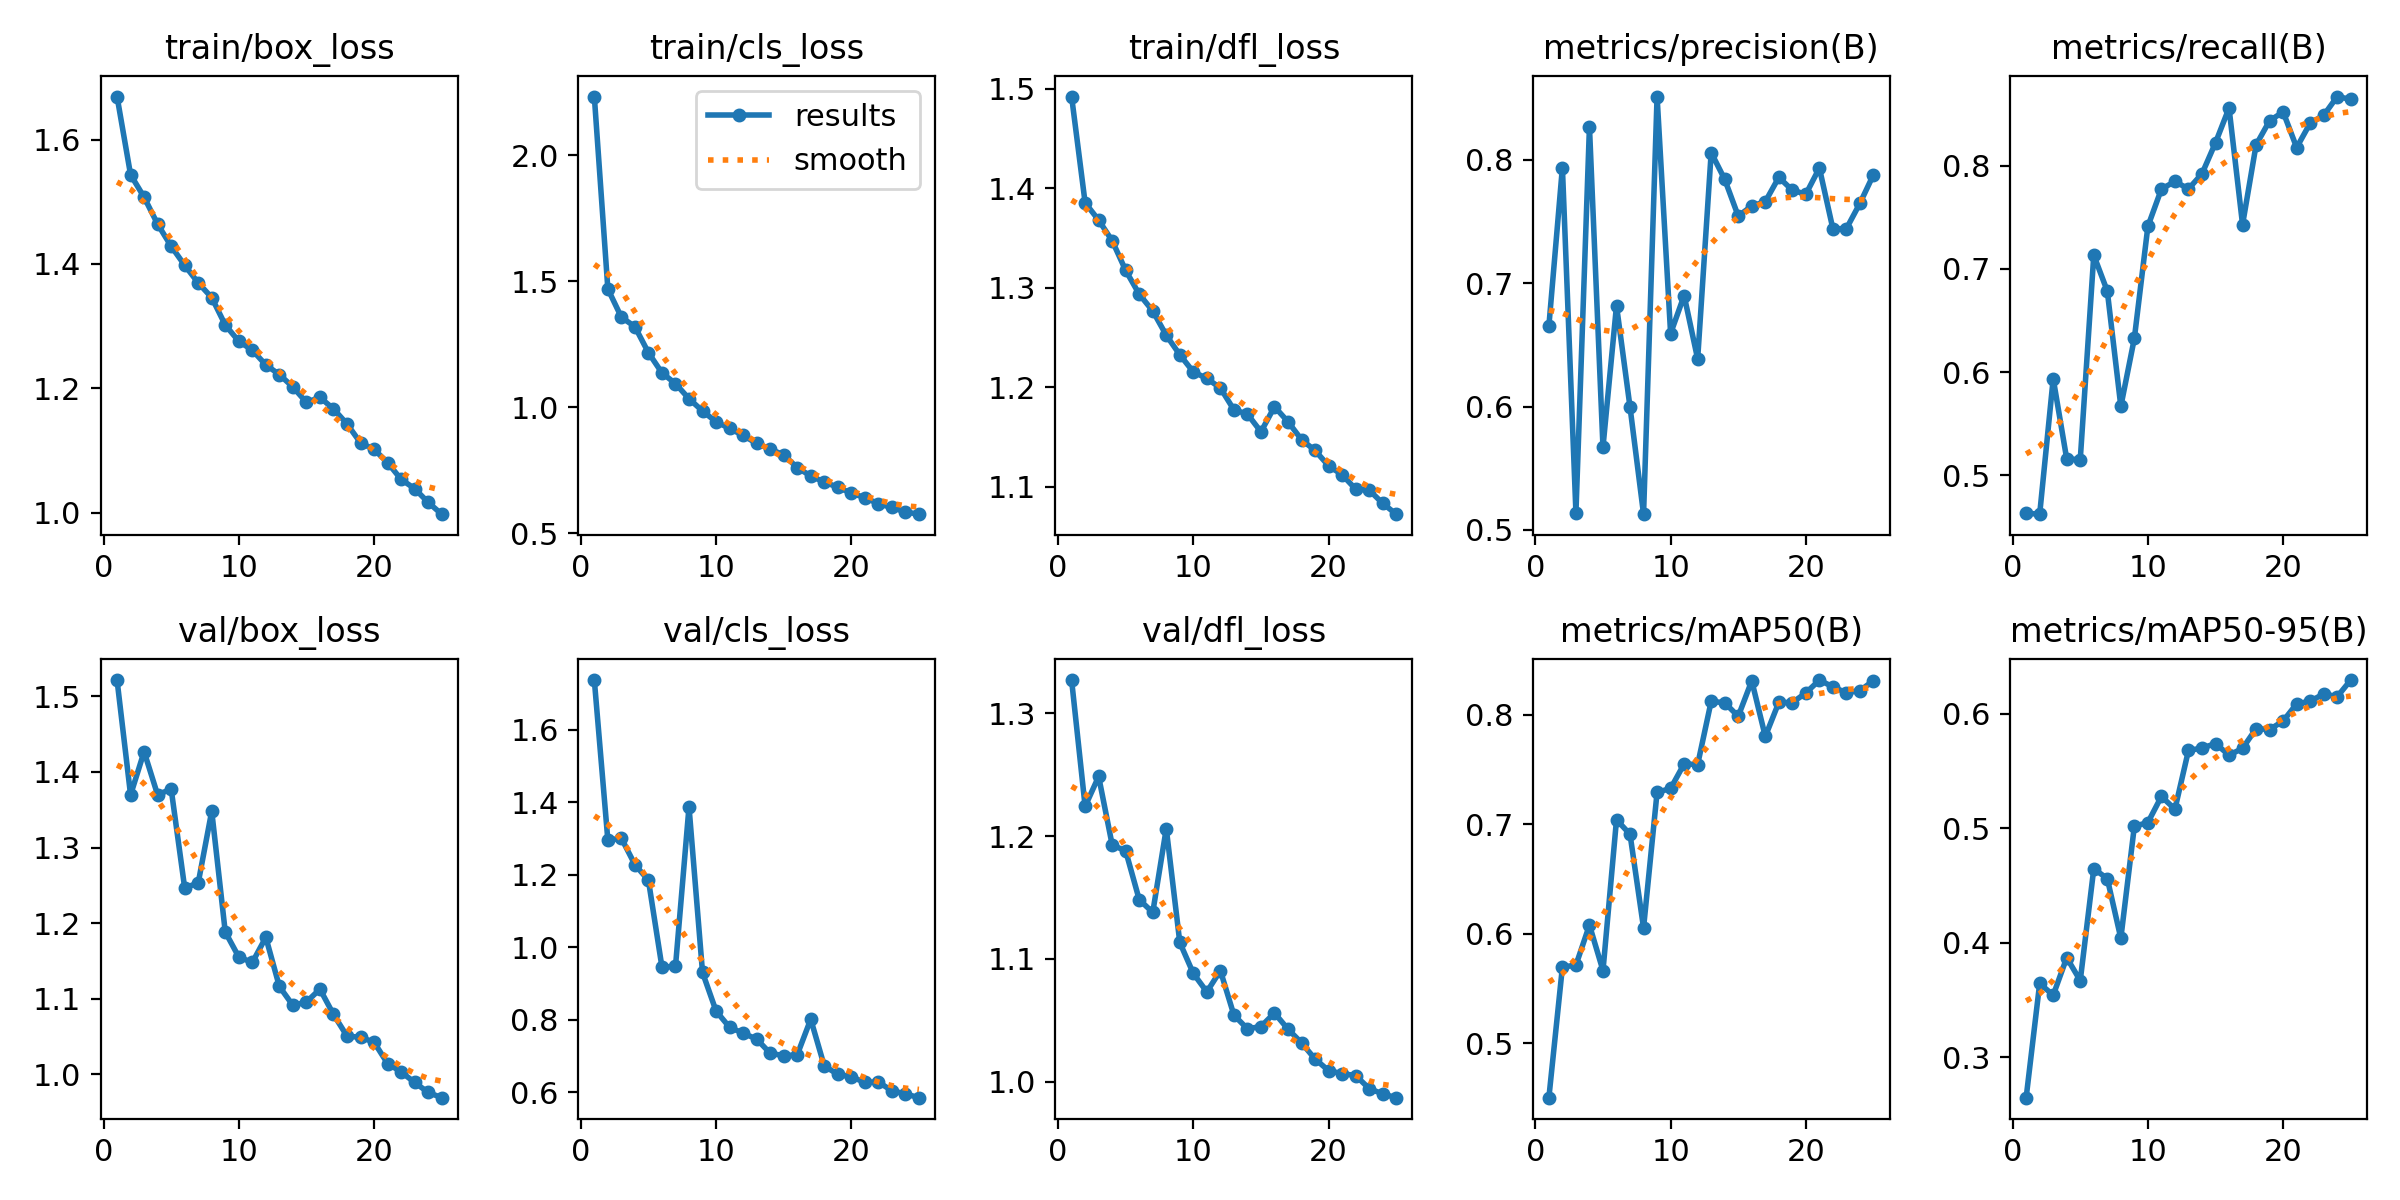

In [15]:
#Showing the results
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


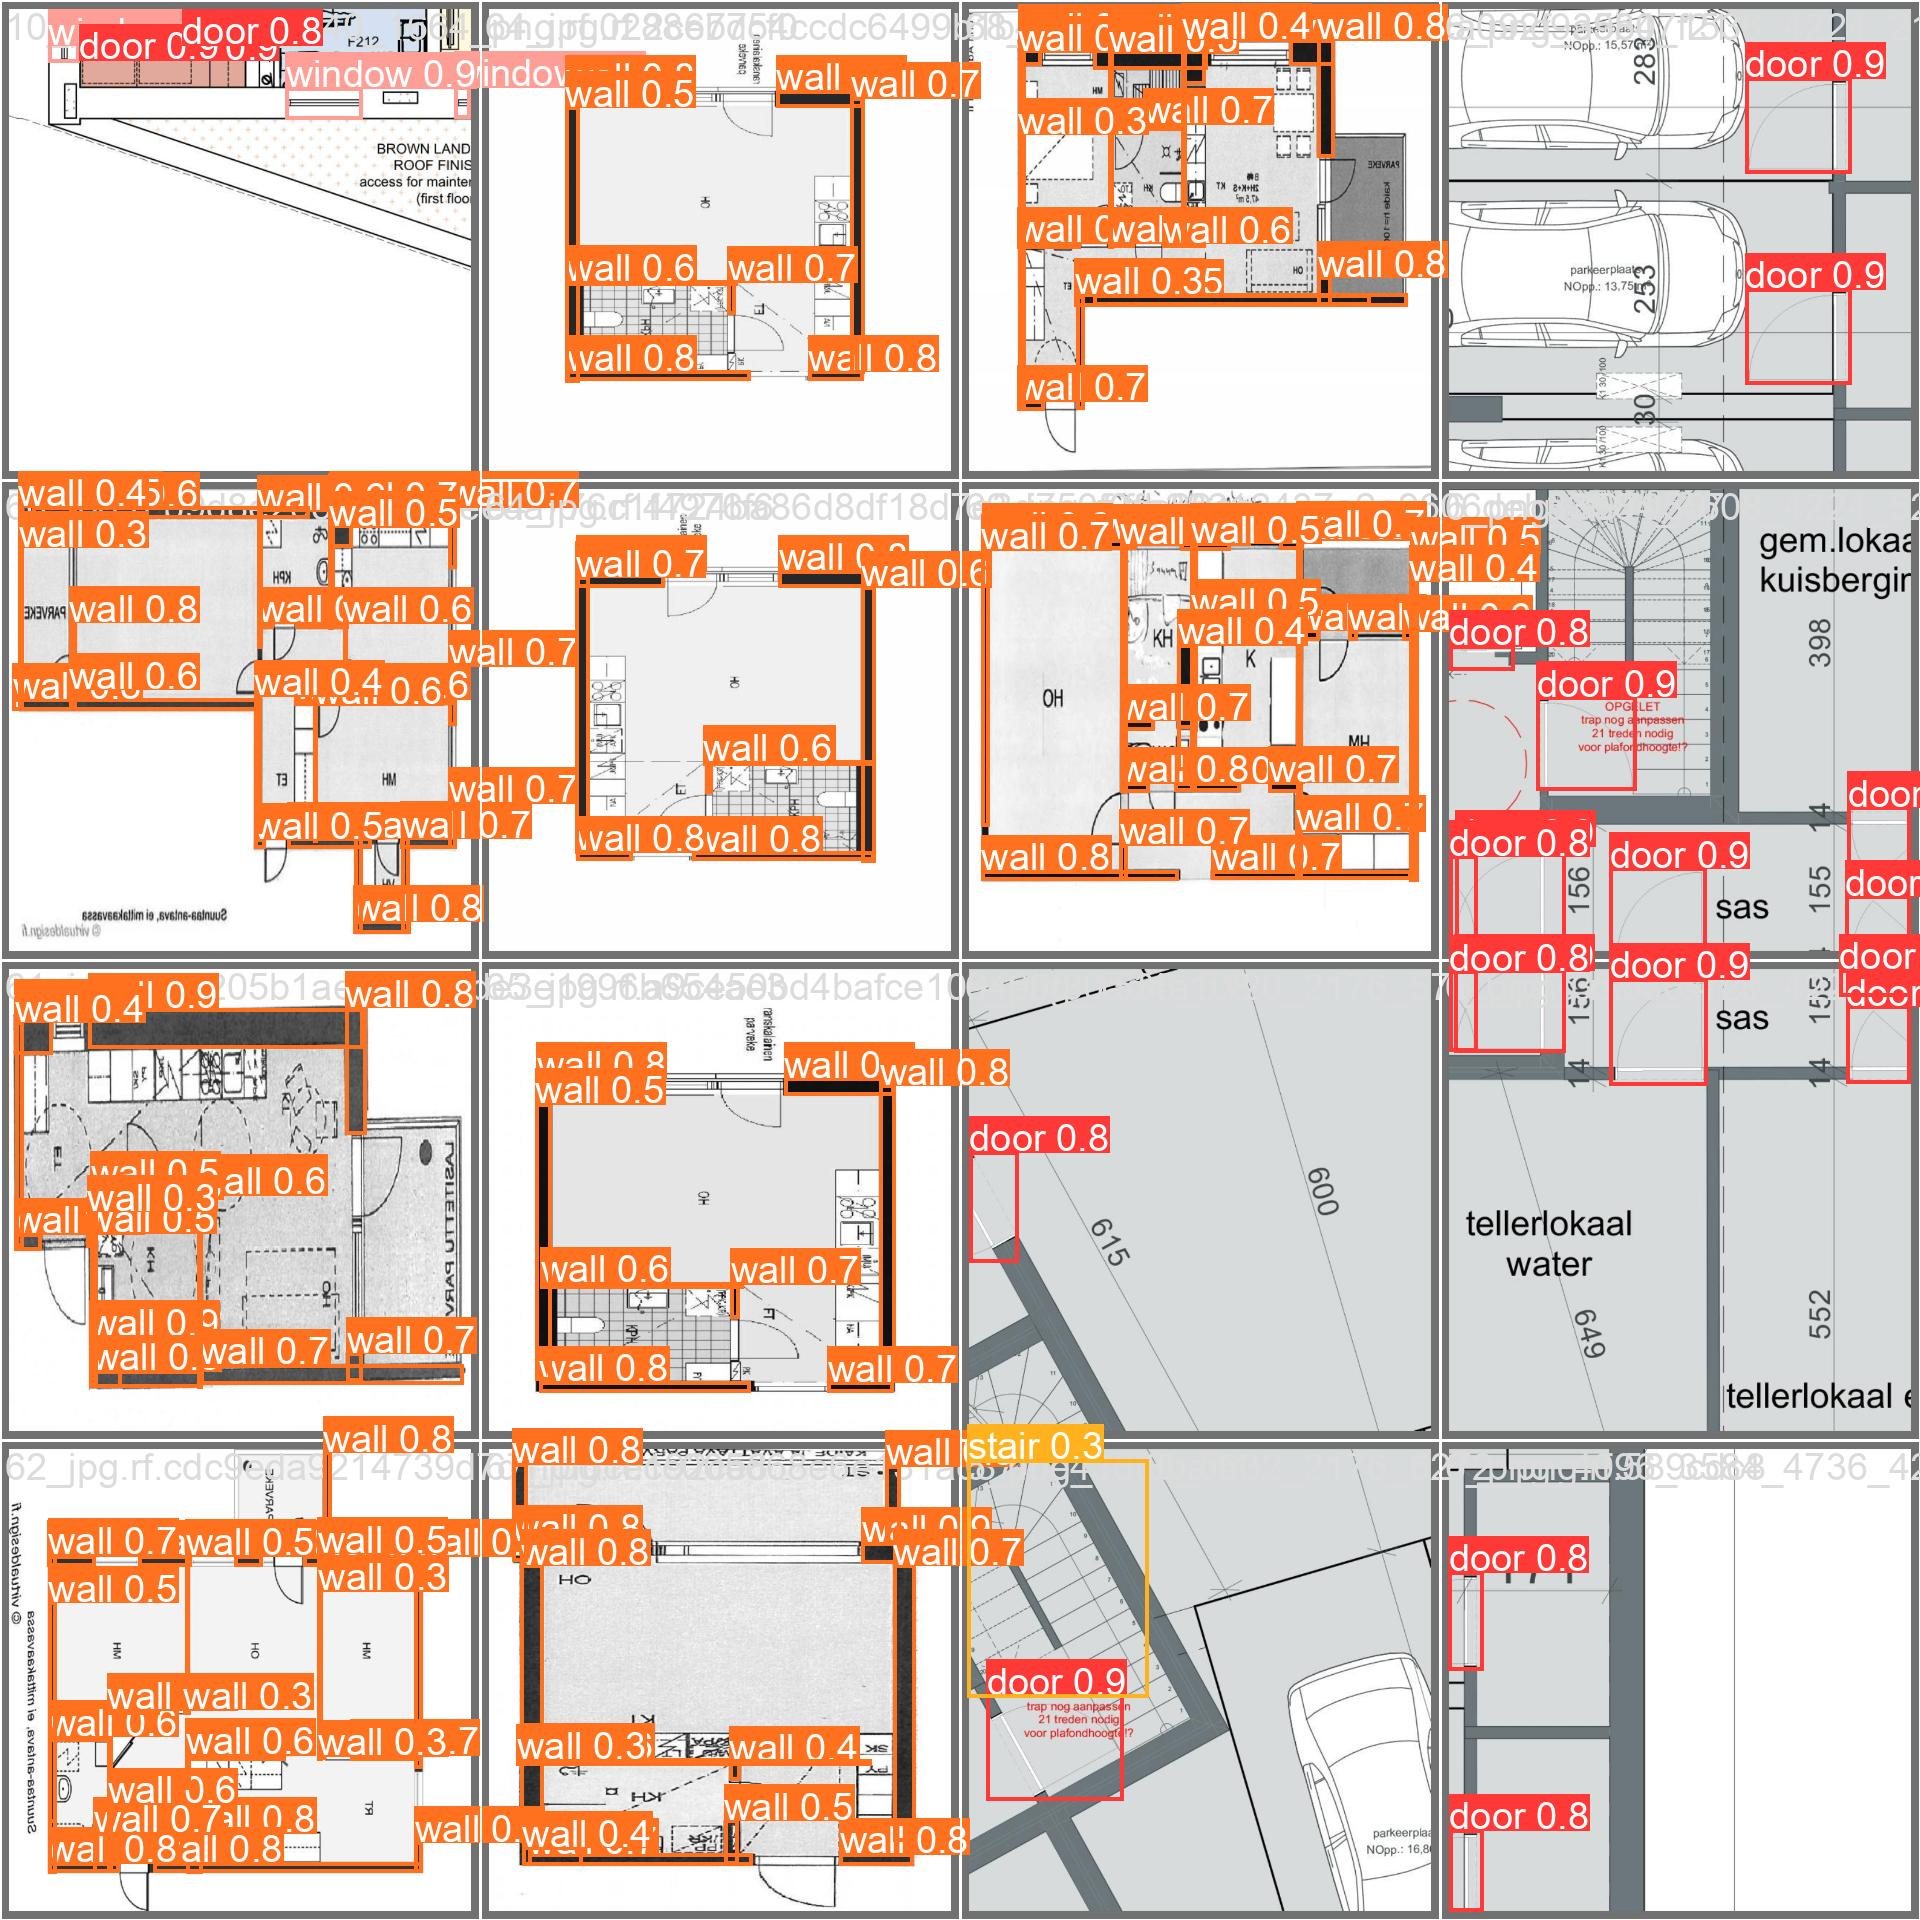

In [16]:
#Showing the validation batch prediction

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#Validate our Model with best-performed model


In [17]:
%cd {HOME}

#!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100% 173/173 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 576, len(boxes) = 1414. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:10<00:00,  1.01it/s]
                   all        173       1414       0.79      0.864      0.832      0.631
                  door        173        431      0.905       0.97      0.981      0.814
                window        173        145      0.907      0.986      0.943       0.81
                  wall        173 

#Get the prediction with our best_performed model

In [21]:
%cd {HOME}
#!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
#!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/test/images save=True

!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/Sample-floor-plan-image-with-the-specification-of-different-room-sizes-and-furniture.png save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/Sample-floor-plan-image-with-the-specification-of-different-room-sizes-and-furniture.png: 800x736 3 doors, 19 walls, 1 stair, 228.5ms
Speed: 13.6ms preprocess, 228.5ms inference, 931.0ms postprocess per image at shape (1, 3, 800, 736)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


#Let's take a look at few results.

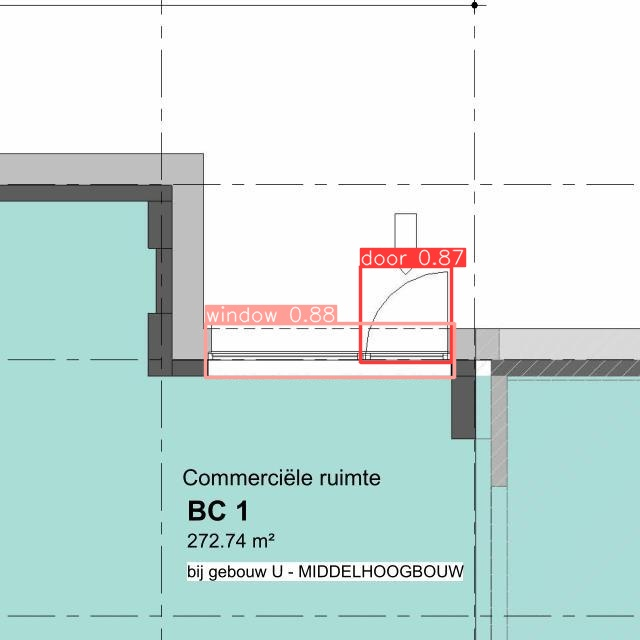

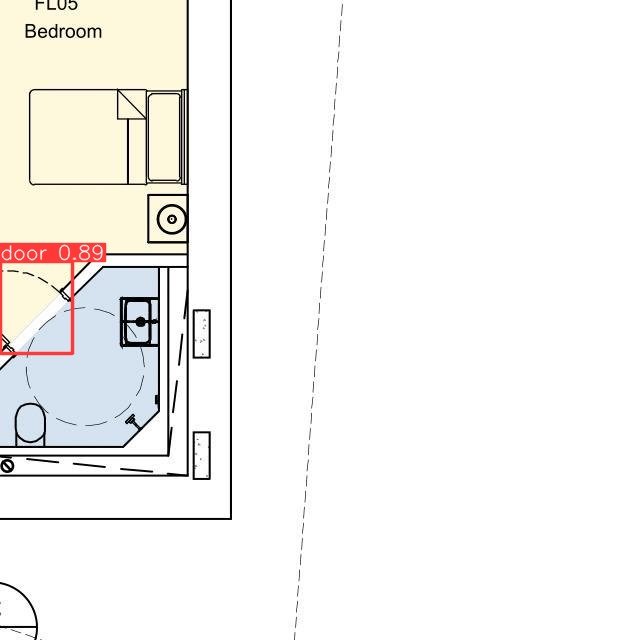

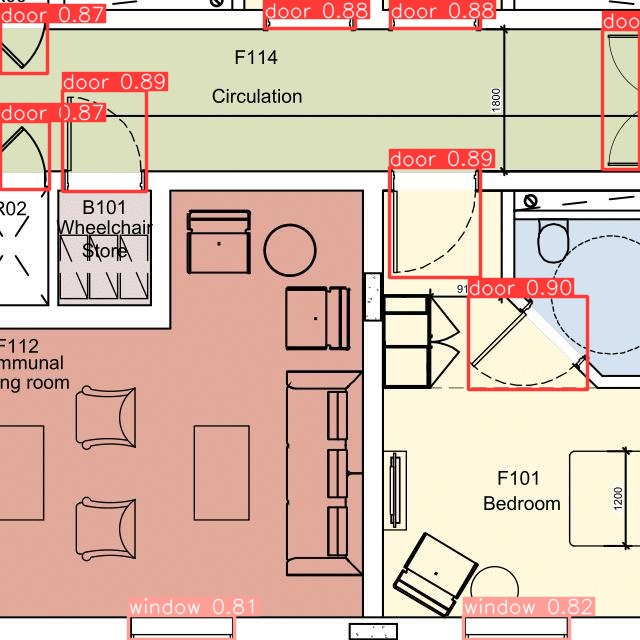

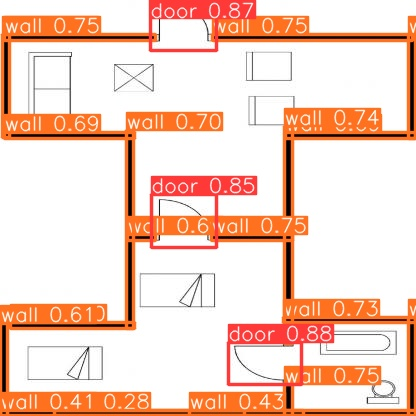

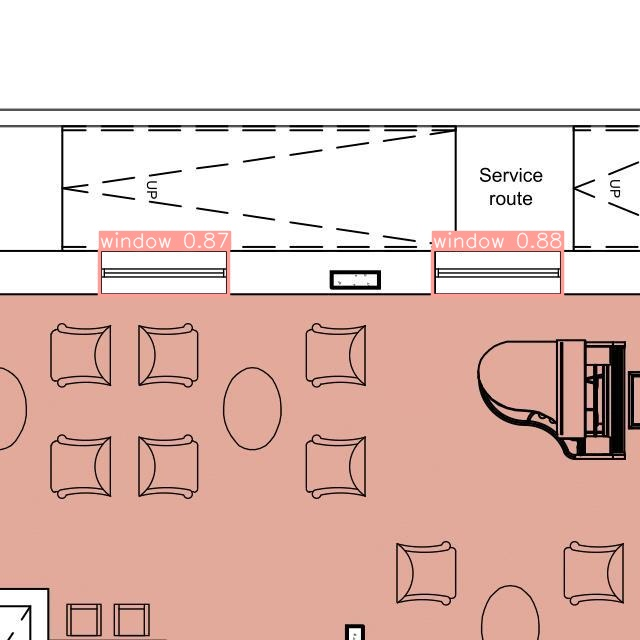

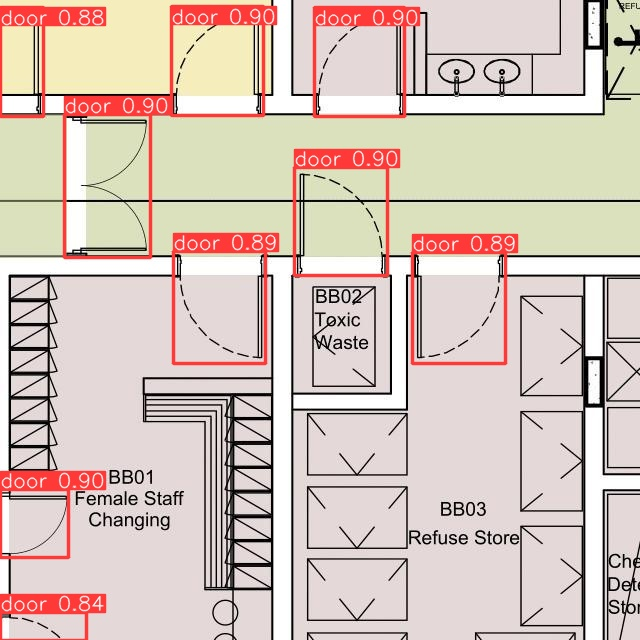

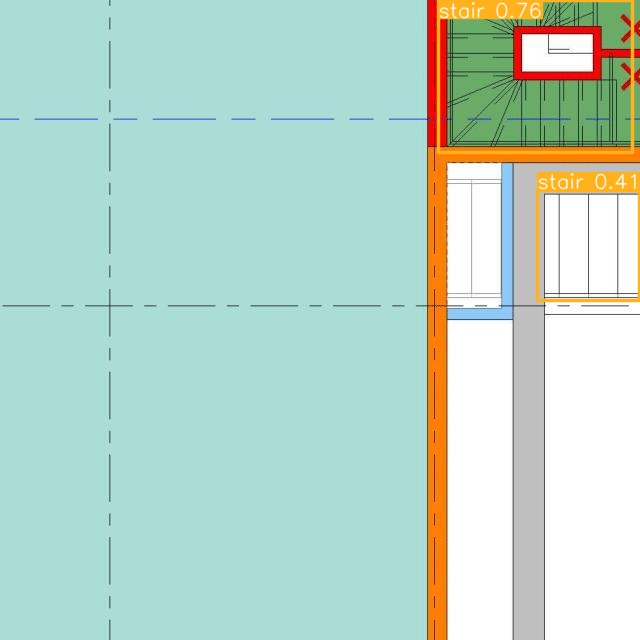

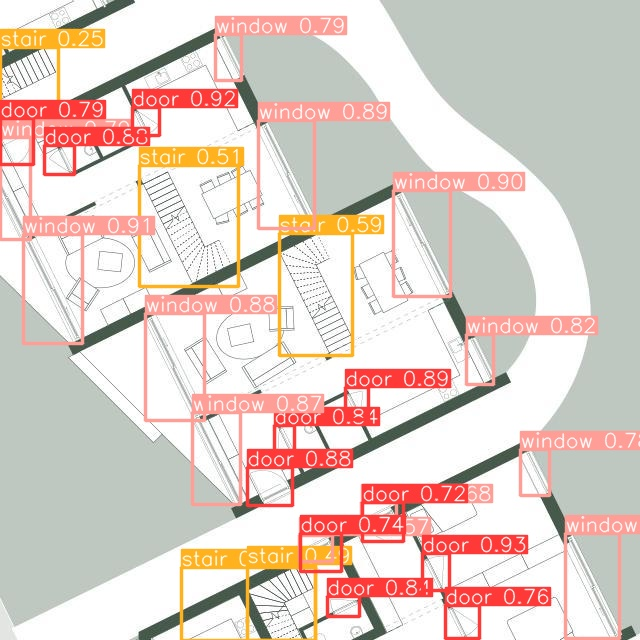

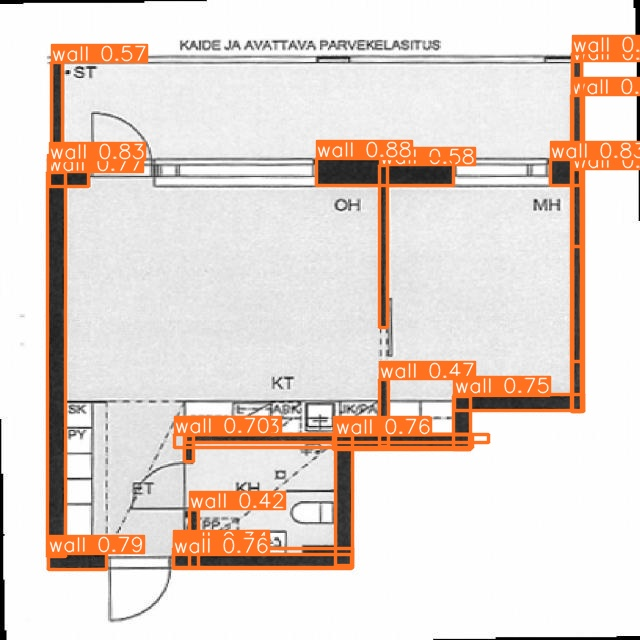

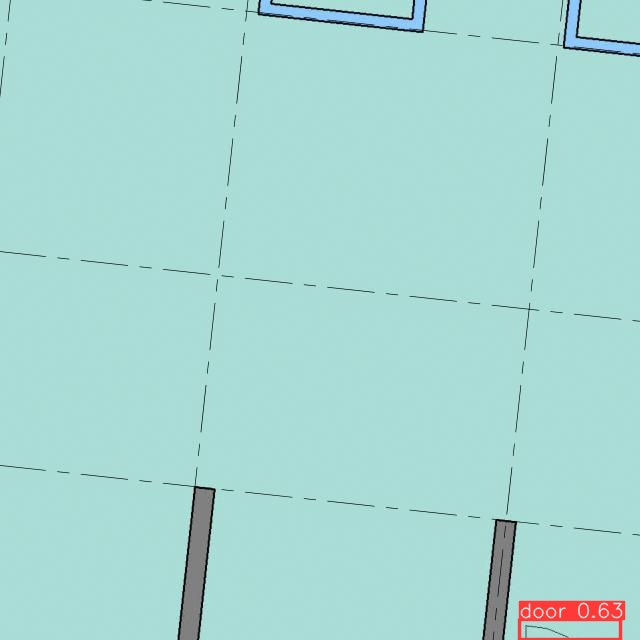

In [20]:
import glob

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")